In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import traceback

# Save Data

In [23]:
cpt_spine_dict = {
    "cervical": {
        "decompression": ["63001", "63015", "63045", "63048", "63020", "63035", "63040", "63043", "63050", "63051", "63075", "63076", "63081", "63082"],
        "fusion": ["22551", "22552", "22554", "22585", "22590", "22595"],
        "instrumentation": ["22845", "22846", "22847", "22840", "22842", "22843", "22844", "22853", "22854", "22849"],
        "bone_grafting": ["20930", "20931", "20936", "20937", "20938", "20939"]
    },
    "thoracic": {
        "decompression": ["63003", "63016", "63046", "63048", "63085", "63086", "63087", "62380"],
        "fusion": ["22556", "22532", "22534", "22612", "22614", "22800", "22802", "22804", "22810", "22812"],
        "instrumentation": ["22840", "22842", "22843", "22844", "22845", "22846", "22847", "22853", "22854", "22849"],
        "bone_grafting": ["20930", "20931", "20936", "20937", "20938", "20939"]
    },
    "lumbar": {
        "decompression": ["63005", "63017", "63047", "63048", "63030", "63035", "63042", "63044", "63052", "63053", "62380", "63090", "63091"],
        "fusion": ["22558", "22585", "22533", "22534", "22612", "22614", "22630", "22632", "22633", "22634", "22800", "22802", "22804", "22810", "22812"],
        "instrumentation": ["22840", "22842", "22843", "22844", "22845", "22846", "22847", "22853", "22854", "22859", "22849"],
        "bone_grafting": ["20930", "20931", "20936", "20937", "20938", "20939"]
    }
}

# Lump spine regions for now
cpt_spine = {}
for region in cpt_spine_dict:
    for proc in cpt_spine_dict[region]:
        if proc not in cpt_spine:
            cpt_spine[proc] = []

        cpt_spine[proc].extend(cpt_spine_dict[region][proc])

cpt_neurovasc = {
    'aneurysm_coiling_embo': ['61624', '61626'],
    'embo': ['75894', '75898'],
    'embo_non_cns_head_neck': ['37241', '37242', '37243', '37244'],
    'thrombectomy': ['61645'],
    'thrombectomy_nonintracranial': ['37184', '37185', '37186'],
    'intracranial_stent_angioplasty': ['61630', '61635', '61640', '61641', '61642'],
    'intraarterial_pharm_infusion': ['61650', '61651'],
    'temp_balloon': ['61623'],
    'cerebral_angio': ['36221', '36222', '36223', '36224', '36225', '36226', '36227', '36228']
}

# Ignore cerebral angio codes for now
ignore_codes = ['36221', '36222', '36223', '36224', '36225', '36226', '36227', '36228']

In [24]:
current_dir = os.getcwd()

In [25]:
spine_data, neurovasc_data, all_data = [], [], []

all_spine_cpt = []
for category in cpt_spine.values():
    all_spine_cpt.extend([code for code in category if code not in ignore_codes])

all_neurovasc_cpt = []
for category in cpt_neurovasc.values():
    all_neurovasc_cpt.extend([code for code in category if code not in ignore_codes])

raw_data_dir = os.path.join(current_dir, "medicare-dataset")
for file in os.listdir(raw_data_dir):
    print(f"Trying to process {file}")
    try:
        f = pd.read_csv(os.path.join(raw_data_dir, file))
        nsg_only = f[f['Rndrng_Prvdr_Type'] == 'Neurosurgery'].reset_index(drop=True)

        year = int(file.replace(".csv", "")[-4:])
        nsg_only['year'] = year
    
        spine_data.append(nsg_only[nsg_only['HCPCS_Cd'].isin(all_spine_cpt)].reset_index(drop=True))
        neurovasc_data.append(nsg_only[nsg_only['HCPCS_Cd'].isin(all_neurovasc_cpt)].reset_index(drop=True))
        all_data.append(nsg_only)
    except:
        print(f"Unable to process {file}")
        traceback.format_exc()
        
spine_data = pd.concat(spine_data, ignore_index=True)
neurovasc_data = pd.concat(neurovasc_data, ignore_index=True)
all_data = pd.concat(all_data)

Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2023.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2022.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2020.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2021.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2019.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process .DS_Store
Unable to process .DS_Store
Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2018.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2016.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2017.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2015.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2014.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2013.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_51916/2592413274.py:15: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


In [26]:
spine_data.shape, neurovasc_data.shape

((120099, 29), (4370, 29))

In [161]:
spine_data.to_csv(os.path.join(current_dir, "processed-data", "spine_cpt_processed.csv"), index=False)

In [20]:
neurovasc_data.to_csv(os.path.join(current_dir, "processed-data", "neurovasc_cpt_processed.csv"), index=False)

In [12]:
total_counts = all_data.groupby('Rndrng_NPI')['Tot_Srvcs'].sum().rename('total_services').reset_index()

In [164]:
interest_counts = spine_data.groupby('Rndrng_NPI')['Tot_Srvcs'].sum().rename('total_spine_services').reset_index()
summary = interest_counts.merge(total_counts, how="outer", on="Rndrng_NPI").fillna(0)
summary['fraction_spine'] = summary['total_spine_services'] / summary['total_services']

In [165]:
summary.to_csv(os.path.join(current_dir, "processed-data", "spine_counts.csv"), index=False)

In [21]:
interest_counts = neurovasc_data.groupby('Rndrng_NPI')['Tot_Srvcs'].sum().rename('total_neurovasc_services').reset_index()
summary = interest_counts.merge(total_counts, how="outer", on="Rndrng_NPI").fillna(0)
summary['fraction_neurovasc'] = summary['total_neurovasc_services'] / summary['total_services']

In [22]:
summary.to_csv(os.path.join(current_dir, "processed-data", "neurovasc_counts.csv"), index=False)

# Load Data

In [168]:
f = pd.read_csv(os.path.join(current_dir, "processed-data", "spine_counts.csv"))

In [169]:
denom = f['total_spine_services'].sum()
denom

3500490.0

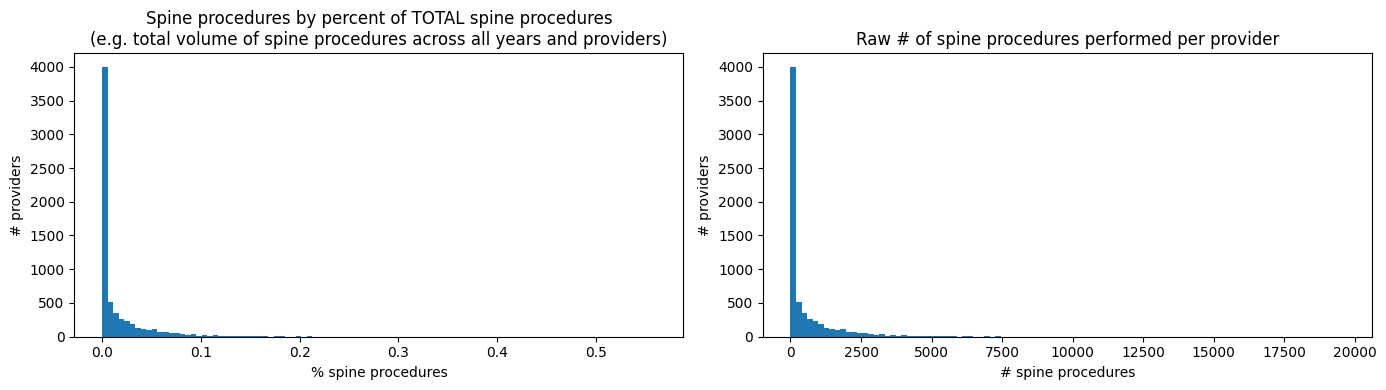

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

axs[0].hist(f['total_spine_services'] / denom * 100, bins=100)
axs[0].set_title("Spine procedures by percent of TOTAL spine procedures\n(e.g. total volume of spine procedures across all years and providers)")
axs[0].set_xlabel("% spine procedures")
axs[0].set_ylabel("# providers")

axs[1].hist(f['total_spine_services'], bins=100)
axs[1].set_title("Raw # of spine procedures performed per provider")
axs[1].set_xlabel("# spine procedures")
axs[1].set_ylabel("# providers")

plt.tight_layout()

In [171]:
cumsum = np.cumsum(sorted(f['total_spine_services'] / denom, reverse=True))
idx = np.searchsorted(cumsum, 0.5, side='right')

In [172]:
print(f"Number of providers accounting for 50% of the spine surgery volume: {idx}")

Number of providers accounting for 50% of the spine surgery volume: 508


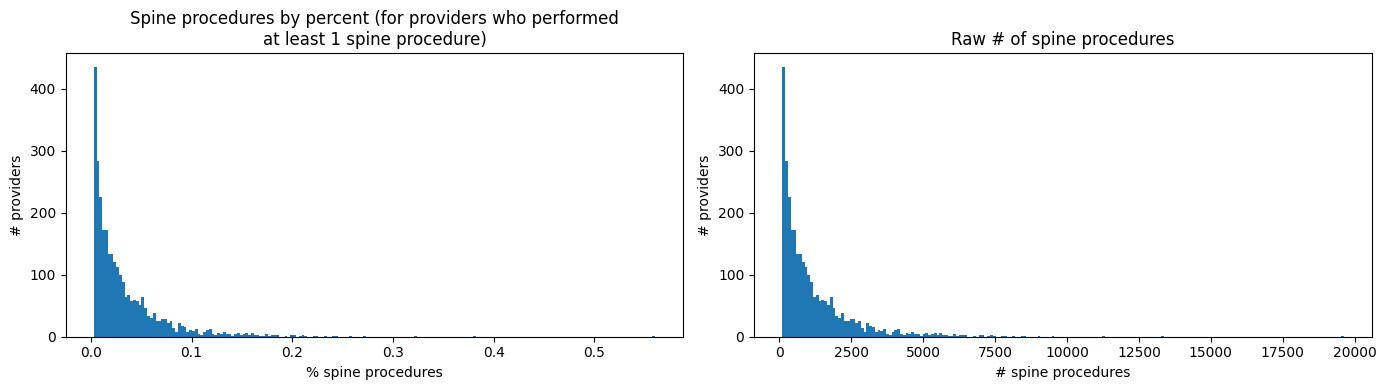

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

f_filtered = f[f['total_spine_services'] > 100].reset_index(drop=True)

axs[0].hist(f_filtered['total_spine_services'] / denom * 100, bins=200)
axs[0].set_title("Spine procedures by percent (for providers who performed\nat least 1 spine procedure)")
axs[0].set_xlabel("% spine procedures")
axs[0].set_ylabel("# providers")

axs[1].hist(f_filtered['total_spine_services'], bins=200)
axs[1].set_title("Raw # of spine procedures")
axs[1].set_xlabel("# spine procedures")
axs[1].set_ylabel("# providers")

plt.tight_layout()

In [175]:
f_filtered.shape

(2961, 4)

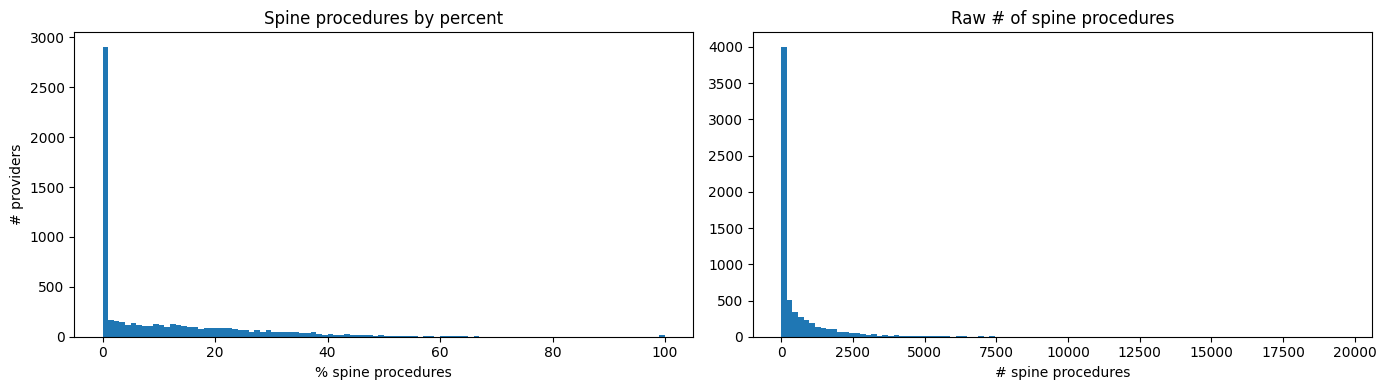

In [176]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

axs[0].hist(f['fraction_spine'] * 100, bins=100)
axs[0].set_title("Spine procedures by percent")
axs[0].set_xlabel("% spine procedures")
axs[0].set_ylabel("# providers")

axs[1].hist(f['total_spine_services'], bins=100)
axs[1].set_title("Raw # of spine procedures")
axs[1].set_xlabel("# spine procedures")
axs[0].set_ylabel("# providers")

plt.tight_layout()

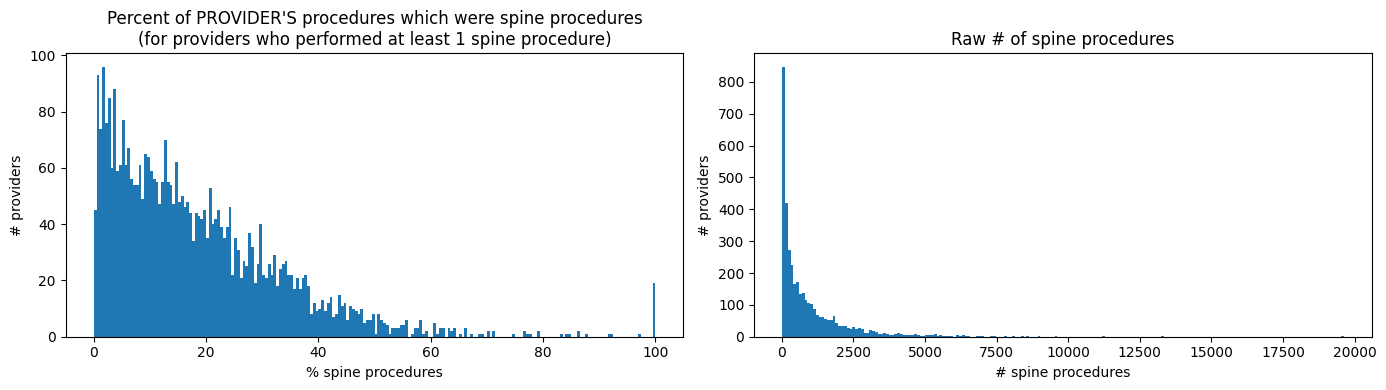

In [177]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

f_filtered = f[f['fraction_spine'] > 0].reset_index(drop=True)

axs[0].hist(f_filtered['fraction_spine'] * 100, bins=200)
axs[0].set_title("Percent of PROVIDER'S procedures which were spine procedures\n(for providers who performed at least 1 spine procedure)")
axs[0].set_xlabel("% spine procedures")
axs[0].set_ylabel("# providers")

axs[1].hist(f_filtered['total_spine_services'], bins=200)
axs[1].set_title("Raw # of spine procedures")
axs[1].set_xlabel("# spine procedures")
axs[1].set_ylabel("# providers")

plt.tight_layout()

In [178]:
f_neurovasc = pd.read_csv(os.path.join(current_dir, "processed-data", "neurovasc_counts.csv"))

In [179]:
denom = f_neurovasc['total_neurovasc_services'].sum()
denom

81682.0

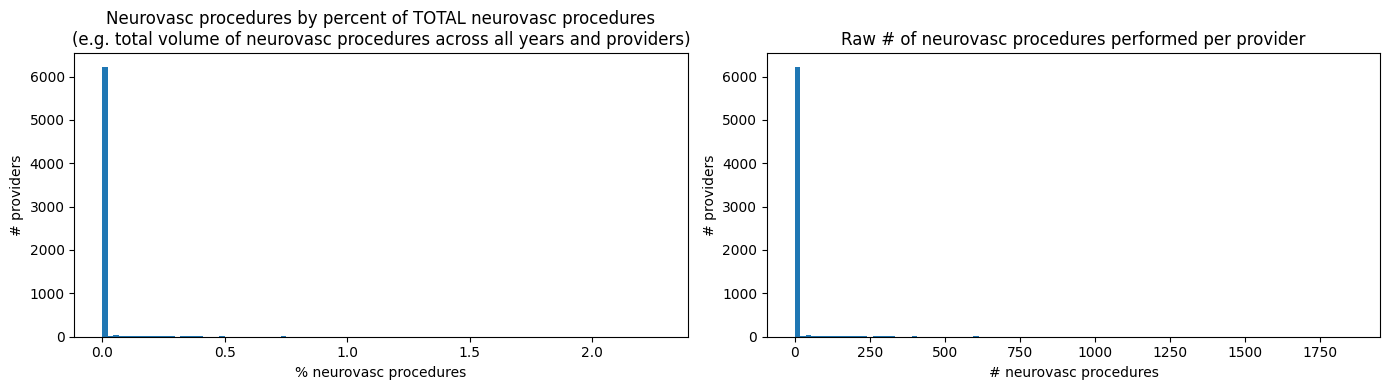

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

# f_filtered = f_neurovasc[f_neurovasc['total_neurovasc_services'] > 0].reset_index(drop=True)

axs[0].hist(f_neurovasc['total_neurovasc_services'] / denom * 100, bins=100)
axs[0].set_title("Neurovasc procedures by percent of TOTAL neurovasc procedures\n(e.g. total volume of neurovasc procedures across all years and providers)")
axs[0].set_xlabel("% neurovasc procedures")
axs[0].set_ylabel("# providers")

axs[1].hist(f_neurovasc['total_neurovasc_services'], bins=100)
axs[1].set_title("Raw # of neurovasc procedures performed per provider")
axs[1].set_xlabel("# neurovasc procedures")
axs[1].set_ylabel("# providers")

plt.tight_layout()

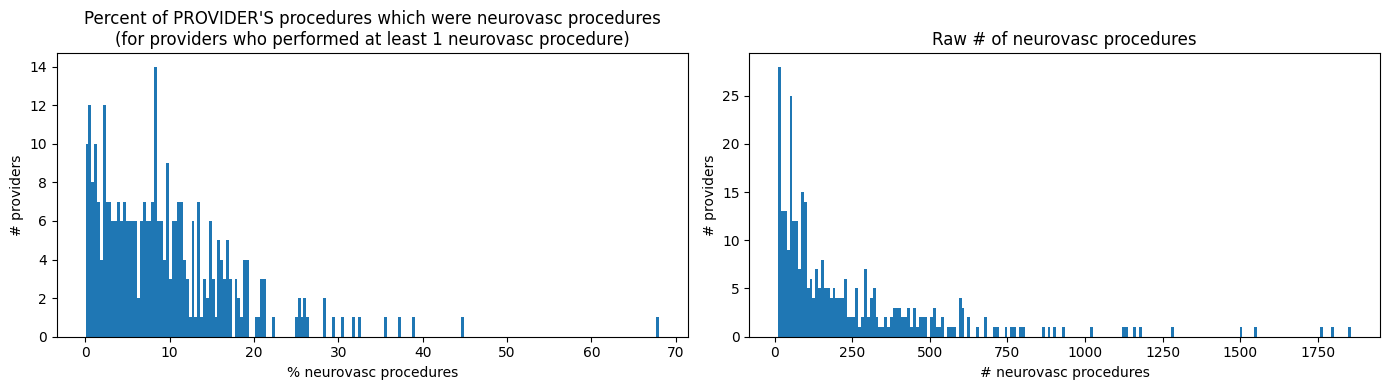

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

f_filtered = f_neurovasc[f_neurovasc['fraction_neurovasc'] > 0].reset_index(drop=True)

axs[0].hist(f_filtered['fraction_neurovasc'] * 100, bins=200)
axs[0].set_title("Percent of PROVIDER'S procedures which were neurovasc procedures\n(for providers who performed at least 1 neurovasc procedure)")
axs[0].set_xlabel("% neurovasc procedures")
axs[0].set_ylabel("# providers")

axs[1].hist(f_filtered['total_neurovasc_services'], bins=200)
axs[1].set_title("Raw # of neurovasc procedures")
axs[1].set_xlabel("# neurovasc procedures")
axs[1].set_ylabel("# providers")

plt.tight_layout()

In [127]:
all_neurovasc_data = []
all_spine_data = []

raw_data_dir = os.path.join(current_dir, "medicare-dataset")
for file in os.listdir(raw_data_dir):
    print(f"Trying to process {file}")
    try:
        f = pd.read_csv(os.path.join(raw_data_dir, file))
        f['year'] = int(file.replace(".csv", "")[-4:])
    
        all_neurovasc_data.append(f[f['HCPCS_Cd'].isin(all_neurovasc_cpt)].reset_index(drop=True))
        all_spine_data.append(f[f['HCPCS_Cd'].isin(all_spine_cpt)].reset_index(drop=True))
    except:
        print(f"Unable to process {file}")
        traceback.format_exc()
        
all_neurovasc_data = pd.concat(all_neurovasc_data, ignore_index=True)
all_spine_data = pd.concat(all_spine_data, ignore_index=True)

Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2023.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2022.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2020.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2021.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2019.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process .DS_Store
Unable to process .DS_Store
Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2018.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2016.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2017.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2015.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2014.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2013.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/427677565.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


In [128]:
all_neurovasc_data.to_csv(os.path.join(current_dir, "processed-data", "neurovasc_cpt_processed_all_specialities.csv"), index=False)
all_spine_data.to_csv(os.path.join(current_dir, "processed-data", "spine_cpt_processed_all_specialities.csv"), index=False)

In [126]:
all_neurovasc_data.groupby('Rndrng_Prvdr_Type').size().reset_index()

,Rndrng_Prvdr_Type,0
0,Cardiology,10
1,Cardiovascular Disease (Cardiology),3
2,Critical Care (Intensivists),1
3,Diagnostic Radiology,473
4,General Surgery,1
5,Interventional Cardiology,1
6,Interventional Pain Management,4
7,Interventional Radiology,281
8,Neurology,246
9,Neuropsychiatry,7


In [129]:
all_spine_data.groupby('Rndrng_Prvdr_Type').size().reset_index()

,Rndrng_Prvdr_Type,0
0,Ambulatory Surgical Center,1323
1,Anesthesiology,38
2,Cardiac Surgery,61
3,Cardiology,9
4,Certified Clinical Nurse Specialist,67
5,Clinic or Group Practice,2
6,Critical Care (Intensivists),12
7,Diagnostic Radiology,2
8,Emergency Medicine,42
9,Family Practice,79


# Scratch

In [151]:
explore_data = []
all_explore_cpt = ['75894']

raw_data_dir = os.path.join(current_dir, "medicare-dataset")
for file in os.listdir(raw_data_dir):
    print(f"Trying to process {file}")
    try:
        f = pd.read_csv(os.path.join(raw_data_dir, file))
        nsg_only = f[f['Rndrng_Prvdr_Type'] == 'Neurosurgery'].reset_index(drop=True)

        year = int(file.replace(".csv", "")[-4:])
        nsg_only['year'] = year
    
        explore_data.append(nsg_only[nsg_only['HCPCS_Cd'].isin(all_explore_cpt)].reset_index(drop=True))
    except:
        print(f"Unable to process {file}")
        traceback.format_exc()
        
explore_data = pd.concat(explore_data, ignore_index=True)

Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2023.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2022.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2020.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2021.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2019.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process .DS_Store
Unable to process .DS_Store
Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2018.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2016.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2017.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2015.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2014.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


Trying to process Medicare_Physician_Other_Practitioners_by_Provider_and_Service_2013.csv


/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/1564488762.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


In [152]:
cpi_map = {
    2013: 233,
    2014: 236.7,
    2015: 237,
    2016: 240,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8,
    2021: 271,
    2022: 292.7,
    2023: 304.7,
    2024: 313.7,
    2025: 322.3
}

explore_data['Tot_Srvcs_Spend'] = explore_data['Tot_Srvcs'] * explore_data['Avg_Mdcr_Stdzd_Amt'] 
util_2023_2013_adj_explore = (
    explore_data
    .groupby(['HCPCS_Cd', 'year'], as_index=False)
    .agg(Sum_Utilization=('Tot_Srvcs', 'sum'),
         Sum_Spend=('Tot_Srvcs_Spend', 'sum'),
         Sum_Provider=('Rndrng_NPI', lambda x: x.nunique()))
)
util_2023_2013_adj_explore['CPI'] = util_2023_2013_adj_explore['year'].map(cpi_map).fillna(0)
util_2023_2013_adj_explore['Sum_Spend_adjusted'] = util_2023_2013_adj_explore['Sum_Spend'] / util_2023_2013_adj_explore['CPI'] * cpi_map[2023]
util_2023_2013_adj_explore['Avg_Price_per_service_adjusted'] = (
    util_2023_2013_adj_explore['Sum_Spend_adjusted'] / util_2023_2013_adj_explore['Sum_Utilization']
)

In [153]:
util_2023_2013_adj_explore

,HCPCS_Cd,year,Sum_Utilization,Sum_Spend,Sum_Provider,CPI,Sum_Spend_adjusted,Avg_Price_per_service_adjusted
0,75894,2013,1347.0,70442.84,68,233.0,92119.885614,68.388928
1,75894,2014,1471.0,77355.18,73,236.7,99578.045399,67.694117
2,75894,2015,1626.0,86966.68,78,237.0,111809.060743,68.763260
3,75894,2016,1510.0,80197.02,77,240.0,101816.799975,67.428344
4,75894,2017,1483.0,81233.98,77,245.1,100987.326422,68.096646
5,75894,2018,1780.0,103360.25,94,251.1,125423.608821,70.462702
6,75894,2019,2207.0,128780.23,106,255.7,153458.490735,69.532619
7,75894,2020,2268.0,131284.61,117,258.8,154568.858837,68.152054
8,75894,2021,2765.0,155303.55,133,271.0,174616.205480,63.152335
9,75894,2022,3278.0,184414.20,159,292.7,191974.741168,58.564595


In [154]:
f = pd.read_csv(os.path.join(raw_data_dir, file))

/var/folders/jv/hvl4bxhn45d10f4fq__lhlxm0000gn/T/ipykernel_33616/3998791135.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv(os.path.join(raw_data_dir, file))


In [155]:
f.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,900 Seton Dr,NaN,Cumberland,MD,...,"Initial hospital inpatient care, typically 50 ...",N,F,138,142.0,142,368.626761,132.170070,104.299718,107.211127
1,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,900 Seton Dr,NaN,Cumberland,MD,...,"Initial hospital inpatient care, typically 70 ...",N,F,95,96.0,96,524.604167,196.932396,155.901146,157.598854
2,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,900 Seton Dr,NaN,Cumberland,MD,...,"Subsequent hospital inpatient care, typically ...",N,F,47,61.0,61,97.000000,37.688197,30.065246,30.584918
3,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,900 Seton Dr,NaN,Cumberland,MD,...,"Subsequent hospital inpatient care, typically ...",N,F,381,777.0,777,187.594595,69.433539,55.091351,55.957773
4,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,900 Seton Dr,NaN,Cumberland,MD,...,"Subsequent hospital inpatient care, typically ...",N,F,106,170.0,170,271.976471,101.070353,80.641235,80.939824
